# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import t
from sklearn import linear_model

# SALÁRIO MÍNIMO

---



# Dados Salário Mínimo

In [2]:
df_sm = pd.read_excel('/content/salario_minimo.xlsx')

**Tratamento dos Dados e Criação de novo DataFrame**

In [3]:
df_sm.head(10)

,Data,Valor (R$)
0,1994.07,64.79
1,1994.08,64.79
2,1994.09,70.00
3,1994.10,70.00
4,1994.11,70.00
5,1994.12,70.00
6,1995.01,70.00
7,1995.02,70.00
8,1995.03,70.00
9,1995.04,70.00


In [4]:
df_sm = df_sm.rename(columns={'Data': 'data', 'Valor (R$)': 'valor'})

In [5]:
df_sm2 = df_sm.groupby('valor').agg(datas=('data', 'unique')).reset_index()


In [6]:
df_sm2.head(5)

,valor,datas
0,64.79,"[1994.07, 1994.08]"
1,70.00,"[1994.09, 1994.1, 1994.11, 1994.12, 1995.01, 1..."
2,100.00,"[1995.05, 1995.06, 1995.07, 1995.08, 1995.09, ..."
3,112.00,"[1996.05, 1996.06, 1996.07, 1996.08, 1996.09, ..."
4,120.00,"[1997.05, 1997.06, 1997.07, 1997.08, 1997.09, ..."


In [7]:
df_sm2['datas'][0][0]

1994.07

In [8]:
valor = []
datas = []
for i in range(len(df_sm2['valor'])):
  valor.append(df_sm2['valor'][i])
  datas.append(df_sm2['datas'][i][0])
#é adicionado a lista datas, as primeiras datas no qual ocorreram mudanças do salário mínimo

In [9]:
datas2 = []
for i in datas:
  i = str(i)
  dig = i[:4]
  dig = int(dig)
  datas2.append(dig)
#a intenção deste código é retirar o valor dos meses, para ficar apenas com o valor do ano

In [10]:
aum = []
for i in range(len(valor)):
  if i == 0:
    aum.append(0)
  else:
    aum.append(round((valor[i]-valor[i-1])/(valor[i-1]),2))
#criação de uma nova coluna com o aumento anual em % do salário mínimo

In [11]:
df_sm = pd.DataFrame()
df_sm['datas'] = datas2
df_sm['valor'] = valor
df_sm['aumento'] = aum

In [12]:
df_sm.head(4)

,datas,valor,aumento
0,1994,64.79,0.00
1,1994,70.00,0.08
2,1995,100.00,0.43
3,1996,112.00,0.12


In [13]:
df_sm = df_sm.reset_index()

In [14]:
duplicados = []
for i in range(len(datas2)):
  if i == (len(datas2)-1):
    break
  elif datas2[i] == datas2[i+1]:
    duplicados.append(i)
duplicados

[0, 18, 28]

In [15]:
for i in duplicados:
  df_sm.drop(df_sm['index'][i], axis =0, inplace=True)
#alguns anos apresentaram mais de uma alteração no valor do salário mínimo
#nestes casos foi considerado apenas o último valor anual

In [16]:
df_sm.drop('index', inplace=True, axis=1)

In [17]:
df_sm.tail(5)

,datas,valor,aumento
26,2018,954.0,0.02
27,2019,998.0,0.05
29,2020,1045.0,0.01
30,2021,1100.0,0.05
31,2022,1212.0,0.10


In [18]:
df_sm = df_sm.reset_index()

In [19]:
df_sm.drop('index', inplace=True, axis=1)

In [20]:
df_sm.tail(5)

,datas,valor,aumento
24,2018,954.0,0.02
25,2019,998.0,0.05
26,2020,1045.0,0.01
27,2021,1100.0,0.05
28,2022,1212.0,0.10


In [21]:
df_sm2 = df_sm.copy()

# Análise dos Dados - Gráficos

**Gráficos**

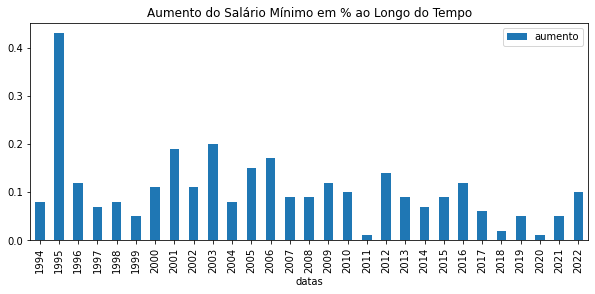

In [22]:
df_sm.plot.bar(x='datas', y='aumento', rot=90, title = 'Aumento do Salário Mínimo em % ao Longo do Tempo',figsize=(10,4));

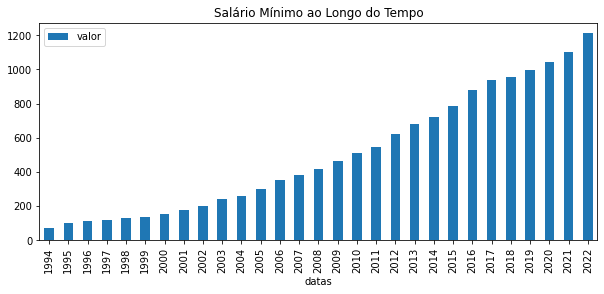

In [23]:
df_sm.plot.bar(x='datas', y='valor', rot=90, title = 'Salário Mínimo ao Longo do Tempo',figsize=(10,4));

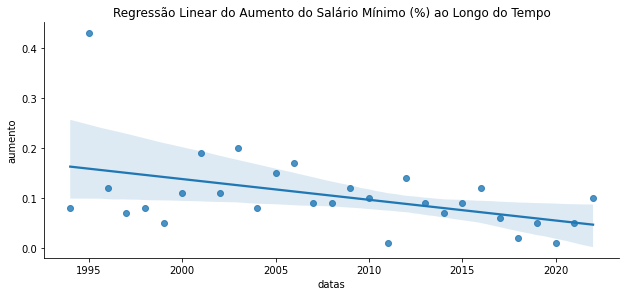

In [24]:
sns.lmplot(x='datas',
            y='aumento',
            data=df_sm, height=4, aspect=2.2).set(title='Regressão Linear do Aumento do Salário Mínimo (%) ao Longo do Tempo')
plt.show()

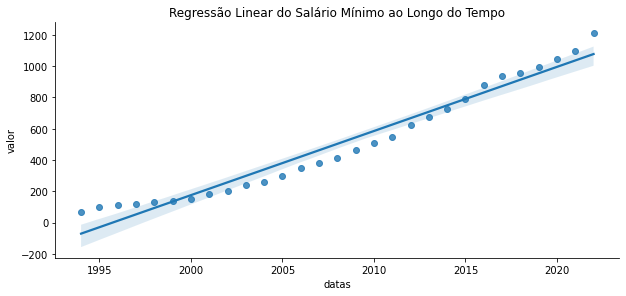

In [25]:
sns.lmplot(x='datas',
            y='valor',
            data=df_sm, height=4, aspect=2.2).set(title='Regressão Linear do Salário Mínimo ao Longo do Tempo')
plt.show()

# Análise dos Dados - Regressão Linear

In [26]:
df_sm.sample(2)

,datas,valor,aumento
6,2000,151.0,0.11
12,2006,350.0,0.17


**Regressão Linear:** Tempo x Aumento do Salário Mínimo

In [27]:
xx = df_sm.drop(columns=['valor','aumento'])
yy = df_sm[['aumento']]

In [28]:
model2 = LinearRegression().fit(xx, yy)

In [29]:
print(f"R²: {model2.score(xx,yy):.4f}")

R²: 0.2029


In [30]:
print('Há uma correlação negativa fraca entre o aumento salarial e o tempo (Baixo R²)')

Há uma correlação negativa fraca entre o aumento salarial e o tempo (Baixo R²)


**Regressão Linear:** Tempo x Salário Mínimo

In [31]:
x = df_sm.drop(columns=['valor','aumento'])
y = df_sm[['valor']]

In [32]:
model = LinearRegression().fit(x, y)

In [33]:
r_sq = model.score(x, y)
b = model.intercept_
a = model.coef_
print(f"R²: {r_sq:.4f}")

R²: 0.9578


In [34]:
print('Há uma correlação positiva e forte entre o salário mínimo e o tempo (R² = 0.96)')

Há uma correlação positiva e forte entre o salário mínimo e o tempo (R² = 0.96)


# Regressão Linear sem dados de 2022

***Valor estimado a partir de Regressão Linear***

In [35]:
df_sm = df_sm[:-1]
#retirada da linha que apresentava o salário mínimo real de 2022

In [36]:
df_sm.tail(2)

,datas,valor,aumento
26,2020,1045.0,0.01
27,2021,1100.0,0.05


In [37]:
x_22 = df_sm.drop(columns=['valor','aumento'])
y_22 = df_sm[['valor']]

In [38]:
model_22 = LinearRegression().fit(x_22, y_22)

In [39]:
r_sq_22 = model_22.score(x_22, y_22)
b_22 = model_22.intercept_
a_22 = model_22.coef_
print(f"R²: {r_sq_22:.4f}")

R²: 0.9574


Intervalo de Confiança

In [40]:
y_predict = model_22.predict(x_22).tolist()
y_pre = []
for i in y_predict:
  for ii in i:
    y_pre.append(ii)

In [41]:
ic = st.t.interval(alpha=0.95, df=len(y_pre)-1,
              loc=np.mean(y_pre),
              scale=st.sem((y_pre)))

In [42]:
media_22 = model_22.predict(x_22).mean()

In [43]:
if media_22-ic[0] == ic[1]-media_22:
  valor_ic = ic[1]-media_22
valor_ic = round(valor_ic,2)

In [44]:
est_2022 = (a_22*2022 + b_22).tolist()
est_2022 = round(est_2022[0][0],2)


In [45]:
df_sm2.tail(2)

,datas,valor,aumento
27,2021,1100.0,0.05
28,2022,1212.0,0.10


In [46]:
dif_est_2022 = round(df_sm2['valor'][len(df_sm2)-1]-est_2022,2)
dif_est_2022_por = round(dif_est_2022*100/(df_sm2['valor'][len(df_sm2)-1]),2)
print(f"Salário mínimo real em 2022: R${df_sm2['valor'][len(df_sm2)-1]}")
print(f'Salário mínimo estimado: R${est_2022}')
print(f"Diferença do valor estimado com o real: R${dif_est_2022}")
print(f'Diferença em porcentagem: {dif_est_2022_por}%')
print(f"Salário estimado + IC: R${est_2022+valor_ic:.2f}")
print(f"Salário estimado - IC: R${est_2022-valor_ic:.2f}")
print(f'R²: {r_sq_22:.4f}')

Salário mínimo real em 2022: R$1212.0
Salário mínimo estimado: R$1057.8
Diferença do valor estimado com o real: R$154.2
Diferença em porcentagem: 12.72%
Salário estimado + IC: R$1185.30
Salário estimado - IC: R$930.30
R²: 0.9574


***Valor estimado a partir de Regressão Linear com Treinamento dos Dados***

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_22, y_22, random_state=13, test_size = 0.3)

In [49]:
model_ml = LinearRegression()
model_ml.fit(X_train, y_train)
pred_train_model_ml = model_ml.predict(X_train)
pred_test_model_ml = model_ml.predict(X_test)

In [50]:
r_sq_ml_train = model_ml.score(X_train, y_train)
r_sq_ml_test = model_ml.score(X_test,y_test)
b_ml = model_ml.intercept_
a_ml = model_ml.coef_
print(f"R² train: {r_sq_ml_train:.4f}")
print(f"R² test: {r_sq_ml_test:.4f}")

R² train: 0.9582
R² test: 0.9529


In [51]:
pred_train_model_ml

array([[ -61.64143768],
       [1017.71270854],
       [  98.26288027],
       [ 378.0954367 ],
       [ 298.14327772],
       [ 937.76054956],
       [ 458.04759568],
       [ 138.23895976],
       [ 498.02367517],
       [ 817.83231109],
       [  58.28680079],
       [ 418.07151619],
       [ 737.88015211],
       [  18.3107213 ],
       [ 178.21503925],
       [ 977.73662905],
       [ 338.11935721],
       [ 577.97583415],
       [ 657.92799313]])

In [52]:
pred_train_model_ml = pred_train_model_ml.tolist()
y_pre_ml = []
for i in pred_train_model_ml:
  for ii in i:
    y_pre_ml.append(ii)

In [53]:
ic_ml = st.t.interval(alpha=0.95, df=len(y_pre_ml)-1,
              loc=np.mean(y_pre_ml),
              scale=st.sem((y_pre_ml)))

In [54]:
media_ml = model_ml.predict(X_train).mean()

In [55]:
if media_ml-ic_ml[0] == ic_ml[1]-media_ml:
  valor_ic_ml = ic_ml[1]-media_ml
valor_ic_ml = round(valor_ic_ml,2)

In [56]:
est_2022_ml= (a_ml*2022 + b_ml).tolist()
est_2022_ml = round(est_2022_ml[0][0],2)

In [57]:
dif_est_2022_ml = round(df_sm2['valor'][len(df_sm2)-1]-est_2022_ml,2)
dif_est_2022_ml_por = round(dif_est_2022_ml*100/(df_sm2['valor'][len(df_sm2)-1]),2)
print(f"Salário mínimo real em 2022: R${df_sm2['valor'][len(df_sm2)-1]}")
print(f'Salário mínimo estimado: R${est_2022_ml}')
print(f"Diferença do valor estimado com o real: R${dif_est_2022_ml}")
print(f'Diferença em porcentagem: {dif_est_2022_ml_por}%')
print(f"Salário estimado + IC: R${est_2022_ml+valor_ic_ml:.2f}")
print(f"Salário estimado - IC: R${est_2022_ml-valor_ic_ml:.2f}")
print(f'R²: {r_sq_ml_train:.4f}')

Salário mínimo real em 2022: R$1212.0
Salário mínimo estimado: R$1057.69
Diferença do valor estimado com o real: R$154.31
Diferença em porcentagem: 12.73%
Salário estimado + IC: R$1220.62
Salário estimado - IC: R$894.76
R²: 0.9582


In [58]:
X_train_regr = sm.add_constant(X_train)
model_lr = sm.OLS(y_train, X_train_regr).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  valor   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     389.6
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.71e-13
Time:                        12:30:38   Log-Likelihood:                -107.33
No. Observations:                  19   AIC:                             218.7
Df Residuals:                      17   BIC:                             220.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.977e+04   4064.544    -19.627      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# ANÁLISE CONSIDERANDO A VARIÁVEL INFLAÇÃO

---



# Dados Inflação

In [59]:
df_i = pd.read_excel('/content/inflação_brasil.xlsx')

In [60]:
df_i.head(4)

,Variação acumulada no ano durante o Plano Real,Unnamed: 1,Unnamed: 2
0,NaN,NaN,Brasil
1,NaN,NaN,NaN
2,199512#dezembro 1995,NaN,"22,41"
3,199612#dezembro 1996,NaN,"9,56"


In [61]:
df_i.drop('Unnamed: 1', inplace=True, axis=1)

In [62]:
df_i=df_i.dropna().reset_index(drop=True)

In [63]:
df_i.sample(2)

,Variação acumulada no ano durante o Plano Real,Unnamed: 2
14,200912#dezembro 2009,"4,31"
15,201012#dezembro 2010,"5,91"


In [64]:
df_i = df_i.rename(columns={'Variação acumulada no ano durante o Plano Real': 'datas', 'Unnamed: 2': 'valor'})

In [65]:
datas = []
for i in df_i['datas']:
  dig = i[:4]
  dig = int(dig)
  datas.append(dig)
df_i['datas']=datas
#é inserido apenas o ano na lista datas

In [66]:
valores=[]
for i in df_i['valor']:
  i = i.replace(',','.')
  i = float(i)
  valores.append(i)
df_i['valor']=valores
#conversão dos valores da coluna 'valor' para float

In [67]:
df_i.head(2)

,datas,valor
0,1995,22.41
1,1996,9.56


In [68]:
df_i2 = df_i.copy()

# Análise dos Dados - Gráficos

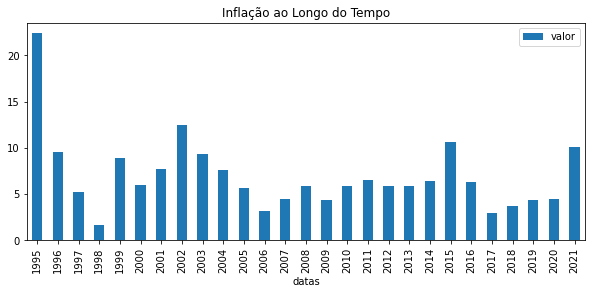

In [69]:
df_i.plot.bar(x='datas', y='valor', rot=90, title = 'Inflação ao Longo do Tempo',figsize=(10,4));

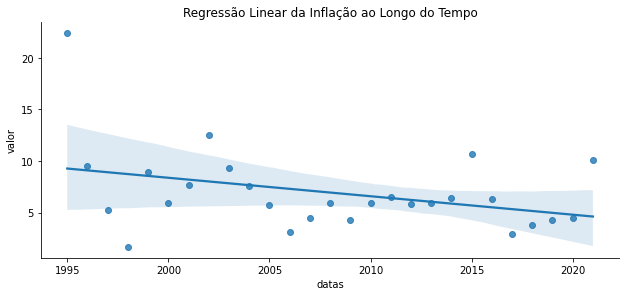

In [70]:
sns.lmplot(x='datas',
            y='valor',
            data=df_i, height=4, aspect=2.2).set(title='Regressão Linear da Inflação ao Longo do Tempo')
plt.show()

# Análise dos Dados - Regressão Linear

In [71]:
df_i.head(3)

,datas,valor
0,1995,22.41
1,1996,9.56
2,1997,5.22


In [72]:
x = df_i.drop(columns=['valor'])
y = df_i[['valor']]

In [73]:
model = LinearRegression().fit(x, y)

In [74]:
r_sq_i = model.score(x, y)
b_i = model.intercept_
a_i = model.coef_
print(f"R²: {r_sq_i:.4f}")

R²: 0.1260


In [75]:
print('Há uma correlação positiva fraca entre a inflação e o tempo (R² = 0.13)')

Há uma correlação positiva fraca entre a inflação e o tempo (R² = 0.13)


# União do dataframe Salário Mínimo (df_sm) com Inflação (df_i)

In [76]:
df_sm.sample(3)

,datas,valor,aumento
12,2006,350.0,0.17
21,2015,788.0,0.09
20,2014,724.0,0.07


In [77]:
df_i.sample(3)

,datas,valor
3,1998,1.65
23,2018,3.75
10,2005,5.69


In [78]:
df_i = df_i.rename(columns={'valor': 'valor infla'})

In [79]:
antes = len(df_sm)
aux = df_sm.merge(df_i[['datas','valor infla']],
                           on = 'datas',
                           how = 'left')
depois = len(aux)
assert antes == depois
df_i_sm = aux
#criação de um novo dataframe unindo o do salário mínimo com o da inflação

In [80]:
df_i_sm.head(3)

,datas,valor,aumento,valor infla
0,1994,70.0,0.08,NaN
1,1995,100.0,0.43,22.41
2,1996,112.0,0.12,9.56


In [81]:
df_i_sm = df_i_sm[1:]
#na tabela fornecida pelo IBGE não consta o valor da inflação de 1994, por isso a sua exclusão

# Regressão Linear do Valor da Inflação com o Salário Mínimo

In [82]:
x_c = df_i_sm[['valor infla']]
y_c = df_i_sm[['valor']]

In [83]:
model_c = LinearRegression().fit(x_c,y_c)
r_sq_c = model_c.score(x_c, y_c)
print(f"R²: {r_sq_c:.4f}")

R²: 0.0827


In [84]:
print ('Há uma relação positiva fraca entre a inflação e o salário mínimo')

Há uma relação positiva fraca entre a inflação e o salário mínimo


# Regressão Linear do Valor da Inflação com o Aumento do Salário Mínimo

In [85]:
x_d = df_i_sm[['aumento']]
y_d = df_i_sm[['valor infla']]

In [86]:
model_d = LinearRegression().fit(x_d,y_d)
r_sq_d = model_d.score(x_d,y_d)
print(f'R²: {r_sq_d:.4f}')

R²: 0.4692


In [87]:
print ('Há uma relação positiva fraca entre a inflação e o salário mínimo')

Há uma relação positiva fraca entre a inflação e o salário mínimo


# Regressão Linear Múltipla

***Aumento do Salário Mínimo x Data e Inflação***

In [88]:
df_i_sm.head(2)

,datas,valor,aumento,valor infla
1,1995,100.0,0.43,22.41
2,1996,112.0,0.12,9.56


In [89]:
x = df_i_sm[['datas', 'valor infla']]
y = df_i_sm['aumento']

In [90]:
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print(f"R²: {r_sq:.4f}")

R²: 0.5564


***Aumento do Salário Mínimo x Salário Mínimo e Inflação***

In [91]:
x = df_i_sm[['valor', 'valor infla']]
y = df_i_sm['aumento']

In [92]:
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print(f"R²: {r_sq:.4f}")

R²: 0.5577


***Salário Mínimo x Data e Inflação***

In [93]:
df_i_sm.tail(2)

,datas,valor,aumento,valor infla
26,2020,1045.0,0.01,4.52
27,2021,1100.0,0.05,10.06


In [94]:
x = df_i_sm[['datas', 'valor infla']]
y = df_i_sm['valor']

In [95]:
model = LinearRegression().fit(x,y)

In [96]:
r_sq_ism = model.score(x,y)
print(f"R²: {r_sq_ism:.4f}")

R²: 0.9659


Predição do Salário Mínimo em 2022 a partir de Regressão Linear Múltipla

In [97]:
media_infla = x['valor infla'].mean()
#média dos valores de inflação

In [98]:
predicao22 = model.coef_[0]*2022 + model.coef_[1]*media_infla + model.intercept_
#o valor de inflação utilizado para 2022 foi a média dos valores de inflação

In [99]:
media_previstasalario = model.predict(x).mean()

In [100]:
y_predict = model.predict(x).tolist()
ic = st.t.interval(alpha=0.95, df=len(y_predict)-1,
              loc=np.mean(y_predict),
              scale=st.sem((y_predict)))

In [101]:
if media_previstasalario-ic[0] == ic[1]-media_previstasalario:
  valor_ic = ic[1]-media_previstasalario
valor_ic = round(valor_ic,2)

In [102]:
print(f"Salário mínimo real em 2022: R$1212.00")
print(f"Salário mínimo estimado: R${predicao22:.2f}")
print(f"Diferença: R${1212-predicao22:.2f} \nDiferença em porcentagem: {((1212-predicao22)*100)/1212:.2f}%")
print(f"Salário estimado + IC: R${predicao22+valor_ic:.2f}")
print(f"Salário estimado - IC: R${predicao22-valor_ic:.2f}")
print(f"R²: {r_sq_ism:.4f}")

Salário mínimo real em 2022: R$1212.00
Salário mínimo estimado: R$1083.09
Diferença: R$128.91 
Diferença em porcentagem: 10.64%
Salário estimado + IC: R$1212.40
Salário estimado - IC: R$953.78
R²: 0.9659


Previsão do Salário Mínimo a partir de Regressão Linear Múltipla com Treinamento dos Dados

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size = 0.3)

In [104]:
media_infla_ml = X_train['valor infla'].mean()
#média dos valores de inflação do grupo de treino

In [105]:
model_ml = LinearRegression()
model_ml.fit(X_train, y_train)
pred_train_model_ml = model_ml.predict(X_train)
pred_test_model_ml = model_ml.predict(X_test)

In [106]:
r_sq_ml_train = model_ml.score(X_train, y_train)
r_sq_ml_test = model_ml.score(X_test,y_test)
b_ml = model_ml.intercept_
a_ml = model_ml.coef_
print(f"R² train: {r_sq_ml_train:.4f}")
print(f"R² test: {r_sq_ml_test:.4f}")

R² train: 0.9714
R² test: 0.8891


In [107]:
ic_ml = st.t.interval(alpha=0.95, df=len(pred_train_model_ml)-1,
              loc=np.mean(pred_train_model_ml),
              scale=st.sem((pred_train_model_ml)))

In [108]:
media_ml = model_ml.predict(X_train).mean()

In [109]:
if media_ml-ic_ml[0] == ic_ml[1]-media_ml:
  valor_ic_ml = ic_ml[1]-media_ml
valor_ic_ml = round(valor_ic_ml,2)

In [110]:
predicao_ml = a_ml[0]*2022 + a_ml[1]*media_infla_ml + b_ml
#o valor de inflação utilizado para 2022 foi a média dos valores de inflação do grupo de treino

In [ ]:
print(f"Salário mínimo real em 2022: R$1212.00")
print(f"Salário mínimo estimado: R${predicao_ml:.2f}")
print(f"Diferença do valor estimado com o real: R${1212-predicao_ml:.2f} \nDiferença em porcentagem: {((1212-predicao_ml)*100)/1212:.2f}%")
print(f"Salário estimado + IC: R${predicao_ml+valor_ic_ml:.2f}")
print(f"Salário estimado - IC: R${predicao22-valor_ic_ml:.2f}")
print(f"R²: {r_sq_ml_train:.4f}")

# Diferença de todos os resultados obtidos

In [112]:
val = [est_2022,est_2022_ml,round(predicao22,2),round(predicao_ml,2)]
dif_em = [dif_est_2022,dif_est_2022_ml,round((1212-predicao22),2),round((1212-predicao_ml),2)]
dif_em_por = [dif_est_2022_por,dif_est_2022_ml_por,
              round((((1212-predicao22)*100)/1212),2),round((((1212-predicao_ml)*100)/1212),2)]
dif_met = ['RL', 'RL com treinamento','RL com Inflação','RL com Inflação e com treinamento']
dif_rsq = [r_sq_22,r_sq_ml_train,r_sq_ism,r_sq_ml_train]
df_diferenca = pd.DataFrame()
df_diferenca['Metodologia'] = dif_met
df_diferenca['Valor SM'] = val
df_diferenca['Diferença em Real']=dif_em
df_diferenca['Diferença em %']=dif_em_por
df_diferenca['R²'] = dif_rsq
df_diferenca

,Metodologia,Valor SM,Diferença em Real,Diferença em %,R²
0,RL,1057.80,154.20,12.72,0.957368
1,RL com treinamento,1057.69,154.31,12.73,0.971367
2,RL com Inflação,1083.09,128.91,10.64,0.965949
3,RL com Inflação e com treinamento,1078.90,133.10,10.98,0.971367


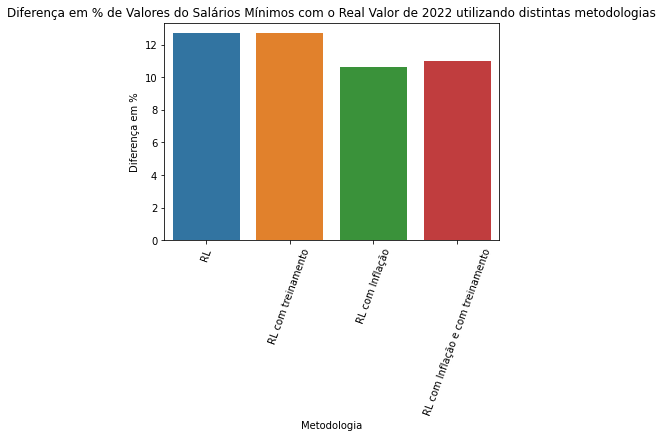

In [113]:
sns.barplot(data=df_diferenca,
            x = 'Metodologia',
            y = 'Diferença em %').set(title='Diferença em % de Valores do Salários Mínimos com o Real Valor de 2022 utilizando distintas metodologias');
plt.xticks(rotation=70);

In [119]:
print('A metodologia que apresentou o salário mínimo mais próximo ao esperado para 2022,')
print('foi a Regressão Linear Múltipla, utilizando para a inflação o valor médio entre 1995-2021')

A metodologia que apresentou o salário mínimo mais próximo ao esperado para 2022,
foi a Regressão Linear Múltipla, utilizando para a inflação o valor médio entre 1995-2021
